<h2>INTRODUCTION<h2>

This dataset is data collected on some customers who are withdrawing their account from a bank due to some loss and other issues.

The objective of this analysis is to try to analyze and predict churn.

Customer churn is a SaaS business metric that measures the amount of customers, accounts, contracts, bookings, etc. that a business has lost over a period of time. Also known as the rate of 

attrition or just 'churn', customer churn is one of the most widely-tracked and heavily-discussed subscription company metrics.

<h4>IMPORT DATA AND PACKAGES<h4>

Import the packages: 
1. Numpy for scientific computing of multidimensional array objects and tools
2. Pandas for data structures and data analysis
3. Matplotlib for data visualization
4. Seaborn for for data visualization


In [55]:
#Import packages for analysis
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#read csv file
churn_data = pd.read_csv('Churn Modeling.csv')


In [56]:
churn_data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [57]:
churn_data.shape

(10000, 14)

This dataset contains 10 000 unique entries and 14 columns

Row Number: position of the entry in the dataset

CustomerId: This attribute is unique and assume that primary key

Surname:    it belongs to surname of customer and string values

CreditScore:    it gives credit score of customers. That score calculates interbank system. High score shows that the customer debt high repayment capacity.

Geography:  it shows country of customer

Gender: male/female

Age:    age of customers

Tenure: The number of years the customer has with the bank.

Balance:    Customer's money in the bank.

NumOfProducts: Number of products owned by the customer.

HasCrCard: Whether the customer has a credit card

IsActiveMember: Customer's presence in the bank

EstimatedSalary:    Customer's estimated salary

Exited: Churn or not


In [58]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [59]:
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


From the information we got from the dataset, our data is divided into:
1. 3 object data types
2. 9 integer data types
3. 2 float data types

I will visualize these in the tables below

In [60]:
churn_data.describe(include=['object'])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


Countries included in the data frame are:
France, Spain, and Germany

In [61]:
churn_data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Gender of customers included in the data:
Female and Male

In [62]:
churn_data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [63]:
churn_data.describe(include=['integer'])

,RowNumber,CustomerId,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,1.530200,0.70550,0.515100,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,0.581654,0.45584,0.499797,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,1.000000,0.00000,0.000000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,1.000000,0.00000,0.000000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,1.000000,1.00000,1.000000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,2.000000,1.00000,1.000000,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,4.000000,1.00000,1.000000,1.000000


In [64]:
churn_data.describe(include=['float'])

,Balance,EstimatedSalary
count,10000.000000,10000.000000
mean,76485.889288,100090.239881
std,62397.405202,57510.492818
min,0.000000,11.580000
25%,0.000000,51002.110000
50%,97198.540000,100193.915000
75%,127644.240000,149388.247500
max,250898.090000,199992.480000


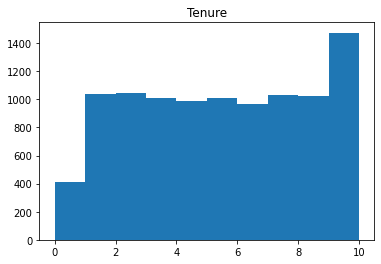

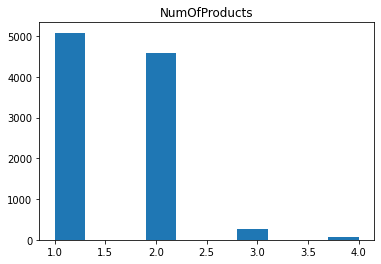

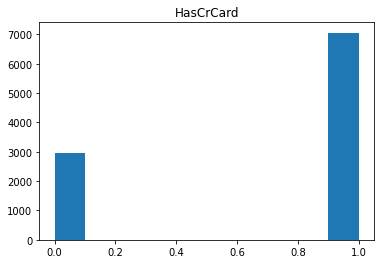

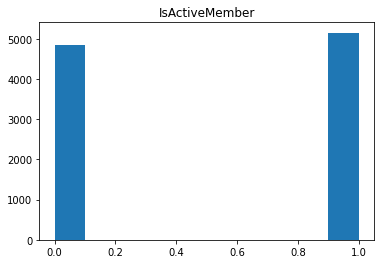

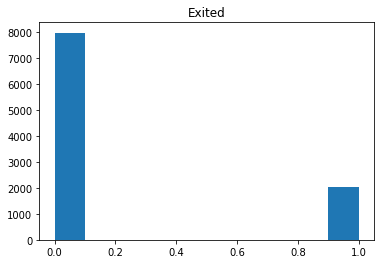

In [65]:
df_num = churn_data[['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']]
df_cat = churn_data[['Geography', 'Gender']]

for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()


                  Tenure  NumOfProducts  HasCrCard  IsActiveMember    Exited
Tenure          1.000000       0.013444   0.022583       -0.028362 -0.014001
NumOfProducts   0.013444       1.000000   0.003183        0.009612 -0.047820
HasCrCard       0.022583       0.003183   1.000000       -0.011866 -0.007138
IsActiveMember -0.028362       0.009612  -0.011866        1.000000 -0.156128
Exited         -0.014001      -0.047820  -0.007138       -0.156128  1.000000


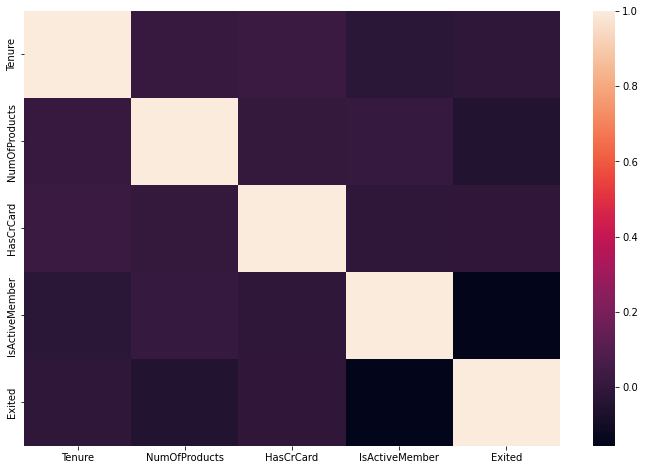

In [66]:
fig_dims = (12,8)
fig, ax = plt.subplots(figsize = fig_dims)
sns.heatmap(df_num.corr(), ax=ax)
print(df_num.corr())
plt.show()


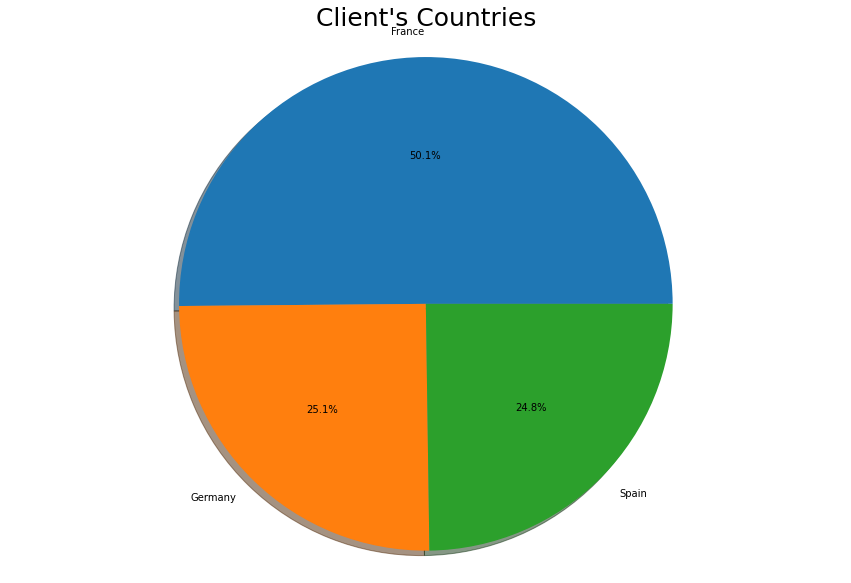

In [69]:
fig, axs = plt.subplots(figsize=(15, 10))
sizes = [churn_data.Geography[churn_data['Geography']=='France'].count(), churn_data.Exited[churn_data['Geography']=='Germany'].count() , churn_data.Exited[churn_data['Geography']=='Spain'].count()]
axs.pie(sizes, labels=['France', 'Germany','Spain'], autopct='%1.1f%%',shadow=True)
axs.axis('equal')
plt.title("Client's Countries", size = 25)
plt.show()

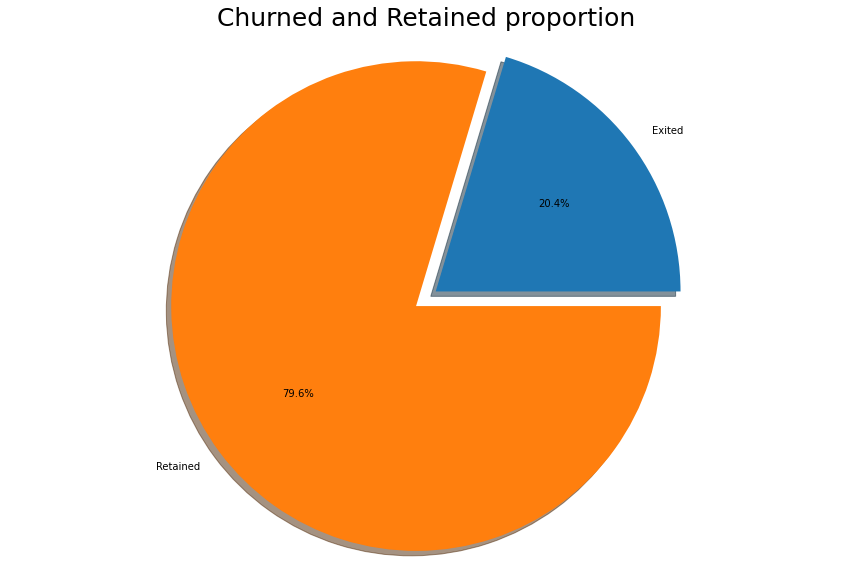

In [72]:
fig, axs = plt.subplots(figsize=(15, 10))
sizes = [churn_data.Exited[churn_data['Exited']==1].count(), churn_data.Exited[churn_data['Exited']==0].count()]
axs.pie(sizes, explode=(0, 0.1), labels=['Exited', 'Retained'], autopct='%1.1f%%',shadow=True)
axs.axis('equal')
plt.title("Churned and Retained proportion", size = 25)
plt.show()